### Read the data, specifying the column names as the file doesn't call for names

In [3]:
import pandas as pd
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names = cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data Cleaning: 
1. Replace non numerical values in what should be a numerical column
2. Convert all columns to numeric, whenever applicable

In [4]:
import numpy as np
cars = cars.replace('?', np.nan)

In [5]:
cars = cars.apply(pd.to_numeric, errors='ignore')

In [6]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Choose the numerical columns only

In [7]:
cars_numeric = cars.select_dtypes(['number'])
cars_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
cars_numeric.isnull().sum()

symboling             0
normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Idea taken from solution, drop na prices 
# because this is what we're trying to predict
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

symboling             0
normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# replace the rest with means
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isnull().sum()

symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
normalized_columns = list(cars_numeric)
normalized_columns.remove('price')

In [12]:
cars_numeric[normalized_columns] = (cars_numeric[normalized_columns] - cars_numeric[normalized_columns].min())/(cars_numeric[normalized_columns].max() - cars_numeric[normalized_columns].min())

In [13]:
cars_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, k, df):
    # randomize the order of rows
    df.reindex(np.random.permutation(df.index))
    
    # Divide the dataframe into test and train
    index = 3*(len(df)//4)
    train_df = df.iloc[0:index]
    test_df = df.iloc[index+1:]
    
    # Create and train the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    return (mean_squared_error(test_df[target_col], predictions))**(1/2)


results = {}
for col in normalized_columns:
    results[col] = knn_train_test(col, 'price', 5, cars_numeric)
    
result_series = pd.Series(results)
result_series.sort_values()  
    
    
    

curb-weight          2489.232469
highway-mpg          2918.998905
engine-size          3575.071782
city-mpg             3668.709035
width                3847.953685
horsepower           3852.529178
wheel-base           5655.812494
compression-rate     5719.875371
height               6548.617426
length               6995.655270
peak-rpm             7181.100435
symboling            7589.793518
stroke               7746.160621
bore                 8251.528615
normalized-losses    9255.095138
dtype: float64

In [15]:
parameterized_results = {}
for col in normalized_columns:
    values = {}
    for k in [1, 3, 5, 7, 9]:
        values[k] = knn_train_test(col, 'price', k, cars_numeric)
    parameterized_results[col] = values
parameterized_results

{'bore': {1: 7567.312096114445,
  3: 9675.025988251056,
  5: 8251.528614844645,
  7: 7862.794215305707,
  9: 6580.364314879778},
 'city-mpg': {1: 5405.322434415915,
  3: 3547.3858067909987,
  5: 3668.70903452427,
  7: 3448.2042049123934,
  9: 3305.555518655462},
 'compression-rate': {1: 9668.288045977943,
  3: 4339.684951186613,
  5: 5719.875370670238,
  7: 6640.256451588082,
  9: 6260.981626601532},
 'curb-weight': {1: 3745.351040957309,
  3: 2533.2453774204787,
  5: 2489.232468854607,
  7: 2677.8346883942163,
  9: 2659.9182033278885},
 'engine-size': {1: 5104.73543682726,
  3: 3858.6664518544053,
  5: 3575.0717821045214,
  7: 3149.3932693295005,
  9: 3118.4948571900823},
 'height': {1: 12020.429799304184,
  3: 8553.720724534636,
  5: 6548.6174261136985,
  7: 6262.740193577001,
  9: 5495.18664967941},
 'highway-mpg': {1: 4238.142154293553,
  3: 3990.3289026233306,
  5: 2918.998905104282,
  7: 2542.7107461068686,
  9: 2376.990899913503},
 'horsepower': {1: 4991.572369504423,
  3: 4298.

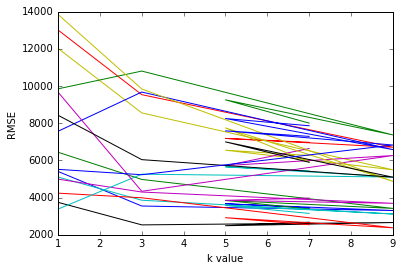

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in parameterized_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
#plt.legend(loc='best')
plt.show()   

In [17]:
# Modify the function to accept a list of train cols
def knn_train_test(train_cols, target_col, k, df):
    # randomize the order of rows
    df.reindex(np.random.permutation(df.index))
    
    # Divide the dataframe into test and train
    index = 3*(len(df)//4)
    train_df = df.iloc[0:index]
    test_df = df.iloc[index+1:]
    
    # Create and train the model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions = knn.predict(test_df[train_cols])
    return (mean_squared_error(test_df[target_col], predictions))**(1/2)

In [18]:
# Average RMSE accross all features to pick features with the least error
averages = {}
for feature,pair in parameterized_results.items():
    averages[feature] = np.mean(list(pair.values()))
averages = pd.Series(averages)
averages.sort_values()
    

curb-weight          2821.116356
highway-mpg          3213.434322
engine-size          3761.272359
city-mpg             3875.035400
horsepower           4161.934946
width                4413.901804
wheel-base           4967.548946
symboling            6491.151113
length               6491.724773
compression-rate     6525.817289
height               7776.138959
bore                 7987.405046
stroke               8444.653114
peak-rpm             8681.506667
normalized-losses    9056.085344
dtype: float64

In [19]:
# Train with the best 2
best_2 = ['curb-weight', 'highway-mpg']
features_rmse_2 = knn_train_test(best_2, 'price', 5, cars_numeric)
features_rmse_2

3097.7427797672294

In [20]:
# Train with the best 3
best_3 = best_2 +['engine-size']
features_rmse_3 = knn_train_test(best_3, 'price', 5, cars_numeric)
features_rmse_3

2765.4647129189693

In [21]:
# Train with the best 4
best_4 = best_3 + ['city-mpg']
features_rmse_4 = knn_train_test(best_4, 'price', 5, cars_numeric)
features_rmse_4

2353.694399194594

In [22]:
# Train with the best 5
best_5 = best_4 + ['horsepower']
features_rmse_5 = knn_train_test(best_5, 'price', 5, cars_numeric)
features_rmse_5

2662.3487251673096

In [27]:
multivariate_results = {}
for col in [best_2, best_3, best_4, best_5]:
    values = {}
    for k in range(1, 26):
        values[k] = knn_train_test(col, 'price', k, cars_numeric)
    multivariate_results[','.join(col)] = values
multivariate_results

{'curb-weight,highway-mpg': {1: 3820.066308325027,
  2: 3039.325481912064,
  3: 3314.785054536384,
  4: 2977.479730829414,
  5: 3097.7427797672294,
  6: 2957.29676901051,
  7: 2814.3491794874412,
  8: 2682.579834436433,
  9: 2615.8502535292205,
  10: 2586.8111161814654,
  11: 2593.9893798568096,
  12: 2643.5270555852294,
  13: 2716.40926951861,
  14: 2700.4729229435015,
  15: 2679.7697557978536,
  16: 2606.1083845967773,
  17: 2566.987009603681,
  18: 2637.220162148389,
  19: 2669.6194231033246,
  20: 2628.442839648601,
  21: 2635.4233996751937,
  22: 2635.5198452743075,
  23: 2516.195399966555,
  24: 2447.631315666343,
  25: 2400.3095189612527},
 'curb-weight,highway-mpg,engine-size': {1: 3649.5062241349856,
  2: 2587.2848789802797,
  3: 2696.204097533337,
  4: 2721.530064366367,
  5: 2765.4647129189693,
  6: 2624.5509242323515,
  7: 2634.0029847502965,
  8: 2694.4478151840312,
  9: 2668.4427962371847,
  10: 2605.543388470052,
  11: 2527.055425386473,
  12: 2503.734142347297,
  13: 24

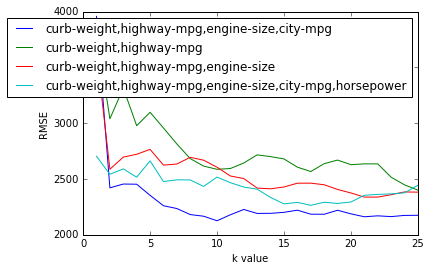

In [30]:
for k, v in multivariate_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc='best')